<a href="https://colab.research.google.com/github/TianaDumitrescu/emotion-recognition/blob/main/cnn_emotion_recognition_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import zipfile

#First I upload file manually as a zip, then I refresh the Files window in colab

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("toronto-data-set.zip") 
zip_ref.extractall()
zip_ref.close()

In [15]:
!ls toronto-data-set

testing  training


In [17]:
!ls toronto-data-set/testing

OAF_angry    OAF_Fear	OAF_neutral	       OAF_Sad
OAF_disgust  OAF_happy	OAF_Pleasant_surprise


In [18]:
import os

#walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("toronto-data-set"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'toronto-data-set'.
There are 7 directories and 0 images in 'toronto-data-set/testing'.
There are 0 directories and 10 images in 'toronto-data-set/testing/OAF_Fear'.
There are 0 directories and 10 images in 'toronto-data-set/testing/OAF_angry'.
There are 0 directories and 10 images in 'toronto-data-set/testing/OAF_happy'.
There are 0 directories and 10 images in 'toronto-data-set/testing/OAF_neutral'.
There are 0 directories and 10 images in 'toronto-data-set/testing/OAF_Pleasant_surprise'.
There are 0 directories and 10 images in 'toronto-data-set/testing/OAF_Sad'.
There are 0 directories and 10 images in 'toronto-data-set/testing/OAF_disgust'.
There are 7 directories and 0 images in 'toronto-data-set/training'.
There are 0 directories and 10 images in 'toronto-data-set/training/OAF_Fear'.
There are 0 directories and 10 images in 'toronto-data-set/training/OAF_angry'.
There are 0 directories and 10 images in 'toronto-data-set/training/OAF_happy'

In [19]:
!ls -la toronto-data-set 

total 16
drwxr-xr-x 4 root root 4096 Feb 26 22:02 .
drwxr-xr-x 1 root root 4096 Feb 26 22:03 ..
drwxr-xr-x 9 root root 4096 Feb 26 22:02 testing
drwxr-xr-x 9 root root 4096 Feb 26 22:02 training


In [21]:
#Another way to find out how many images are in a file
num_angry_images_train = len(os.listdir("toronto-data-set/training/OAF_angry"))
num_angry_images_train

10

In [22]:
#To visualize our images, we can find class names programmatically

#Get the classnames rogrammatically
import pathlib
import numpy as np

data_dir = pathlib.Path("data_steak")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class names from the subdirectory
class_names = class_names[1:]
print(class_names)

[]


['OAF_base_happy_default.jpg']
Image shape: (369, 496, 3)


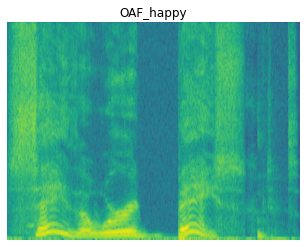

In [26]:
#Visualizing our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg .imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  
  print(f"Image shape: {img.shape}") #show the shape of the image // we'll use this to turn into tensor later on

  return img

#View the random image from the training dataset
img = view_random_image(target_dir="toronto-data-set/training/",
                        target_class="OAF_happy")

In [27]:
#Turn image into tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(369, 496, 3), dtype=uint8, numpy=
array([[[ 35, 128, 118],
        [ 34, 131, 122],
        [ 34, 135, 127],
        ...,
        [ 46,  84, 129],
        [ 58,  94, 142],
        [ 32,  70, 117]],

       [[ 35, 130, 122],
        [ 36, 133, 126],
        [ 35, 136, 130],
        ...,
        [ 45,  86, 130],
        [ 59, 100, 146],
        [ 40,  81, 127]],

       [[ 37, 132, 128],
        [ 38, 134, 132],
        [ 37, 138, 134],
        ...,
        [ 43,  90, 132],
        [ 61, 105, 150],
        [ 49,  96, 140]],

       ...,

       [[102, 195,  91],
        [105, 198,  91],
        [112, 211,  92],
        ...,
        [ 51, 186, 120],
        [ 63, 189, 116],
        [ 60, 180, 106]],

       [[109, 197,  87],
        [111, 202,  85],
        [120, 215,  89],
        ...,
        [ 53, 189, 117],
        [ 63, 190, 111],
        [ 58, 180,  97]],

       [[103, 201,  90],
        [116, 205,  87],
        [117, 207,  84],
        ...,
        [ 56, 182, 12

In [29]:
#View the image shape
img.shape #returns width, height, color channels

(369, 496, 3)

In [28]:
#Normalization of Data (Creating a scalar by setting data as values between 0 and 1)

#Get all the pixel values between 0 and 1
img/255.

array([[[0.1372549 , 0.50196078, 0.4627451 ],
        [0.13333333, 0.51372549, 0.47843137],
        [0.13333333, 0.52941176, 0.49803922],
        ...,
        [0.18039216, 0.32941176, 0.50588235],
        [0.22745098, 0.36862745, 0.55686275],
        [0.1254902 , 0.2745098 , 0.45882353]],

       [[0.1372549 , 0.50980392, 0.47843137],
        [0.14117647, 0.52156863, 0.49411765],
        [0.1372549 , 0.53333333, 0.50980392],
        ...,
        [0.17647059, 0.3372549 , 0.50980392],
        [0.23137255, 0.39215686, 0.57254902],
        [0.15686275, 0.31764706, 0.49803922]],

       [[0.14509804, 0.51764706, 0.50196078],
        [0.14901961, 0.5254902 , 0.51764706],
        [0.14509804, 0.54117647, 0.5254902 ],
        ...,
        [0.16862745, 0.35294118, 0.51764706],
        [0.23921569, 0.41176471, 0.58823529],
        [0.19215686, 0.37647059, 0.54901961]],

       ...,

       [[0.4       , 0.76470588, 0.35686275],
        [0.41176471, 0.77647059, 0.35686275],
        [0.43921569, 0

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:



*   Load our images
*   Preprocess our images
*   Build a CNN to find patterns in our images
*   Compile our CNN
*   Fit the CNN to our training data

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup paths to our training directories
train_dir = "/content/toronto-data-set/training/"
test_dir = "/content/toronto-data-set/testing/"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32, 
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

#Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


Found 70 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Epoch 1/5
3/3 [==============================] - 6s 1s/step - loss: -3.4610 - accuracy: 0.1429 - val_loss: -28.9401 - val_accuracy: 0.1429
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: -37.7281 - accuracy: 0.1429 - val_loss: -88.6843 - val_accuracy: 0.1429
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: -104.6377 - accuracy: 0.1429 - val_loss: -203.0891 - val_accuracy: 0.1429
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: -287.8250 - accuracy: 0.1429 - val_loss: -417.2589 - val_accuracy: 0.1429
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: -575.2310 - accuracy: 0.1429 - val_loss: -807.6235 - val_accuracy: 0.1429


In [31]:
len(train_data)

3